# Wholesale customers

https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)

### Цель - кластеризация покупателей и выделение выбросов

#### Датасет

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Wholesale_customers_data.csv')

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


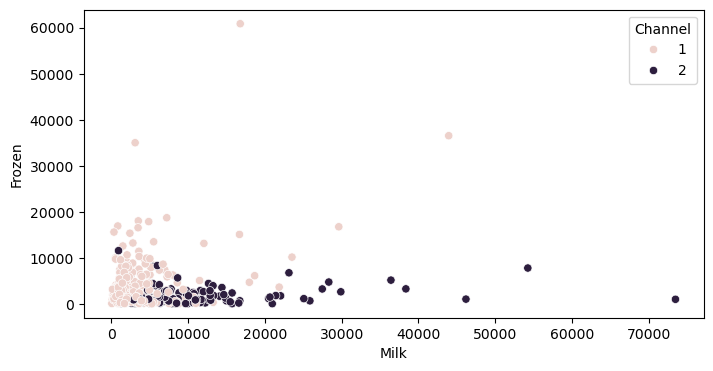

In [2]:
plt.figure(figsize = (8,4), dpi = 100)
sns.scatterplot(data=df,x='Milk',y='Frozen',hue='Channel')
plt.show()

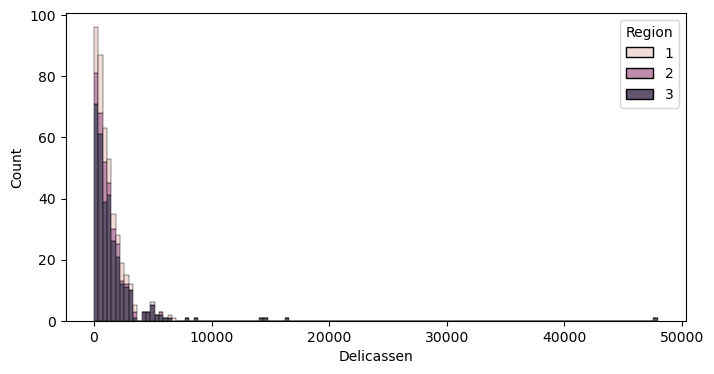

In [3]:
plt.figure(figsize = (8,4), dpi = 100)
sns.histplot(df,x='Delicassen',hue='Region',multiple="stack")
plt.show()

#### Heatmap

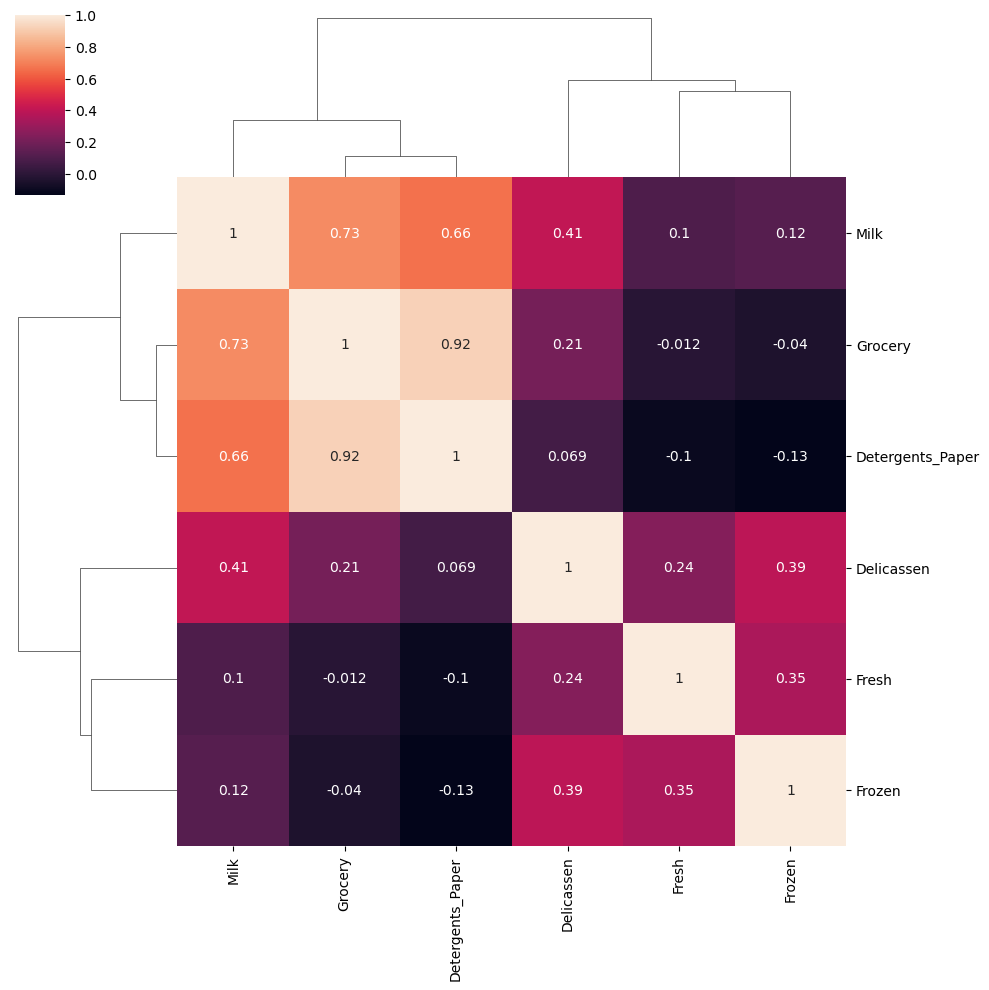

In [4]:
sns.clustermap(df.drop(['Region','Channel'],axis=1).corr(),annot=True);

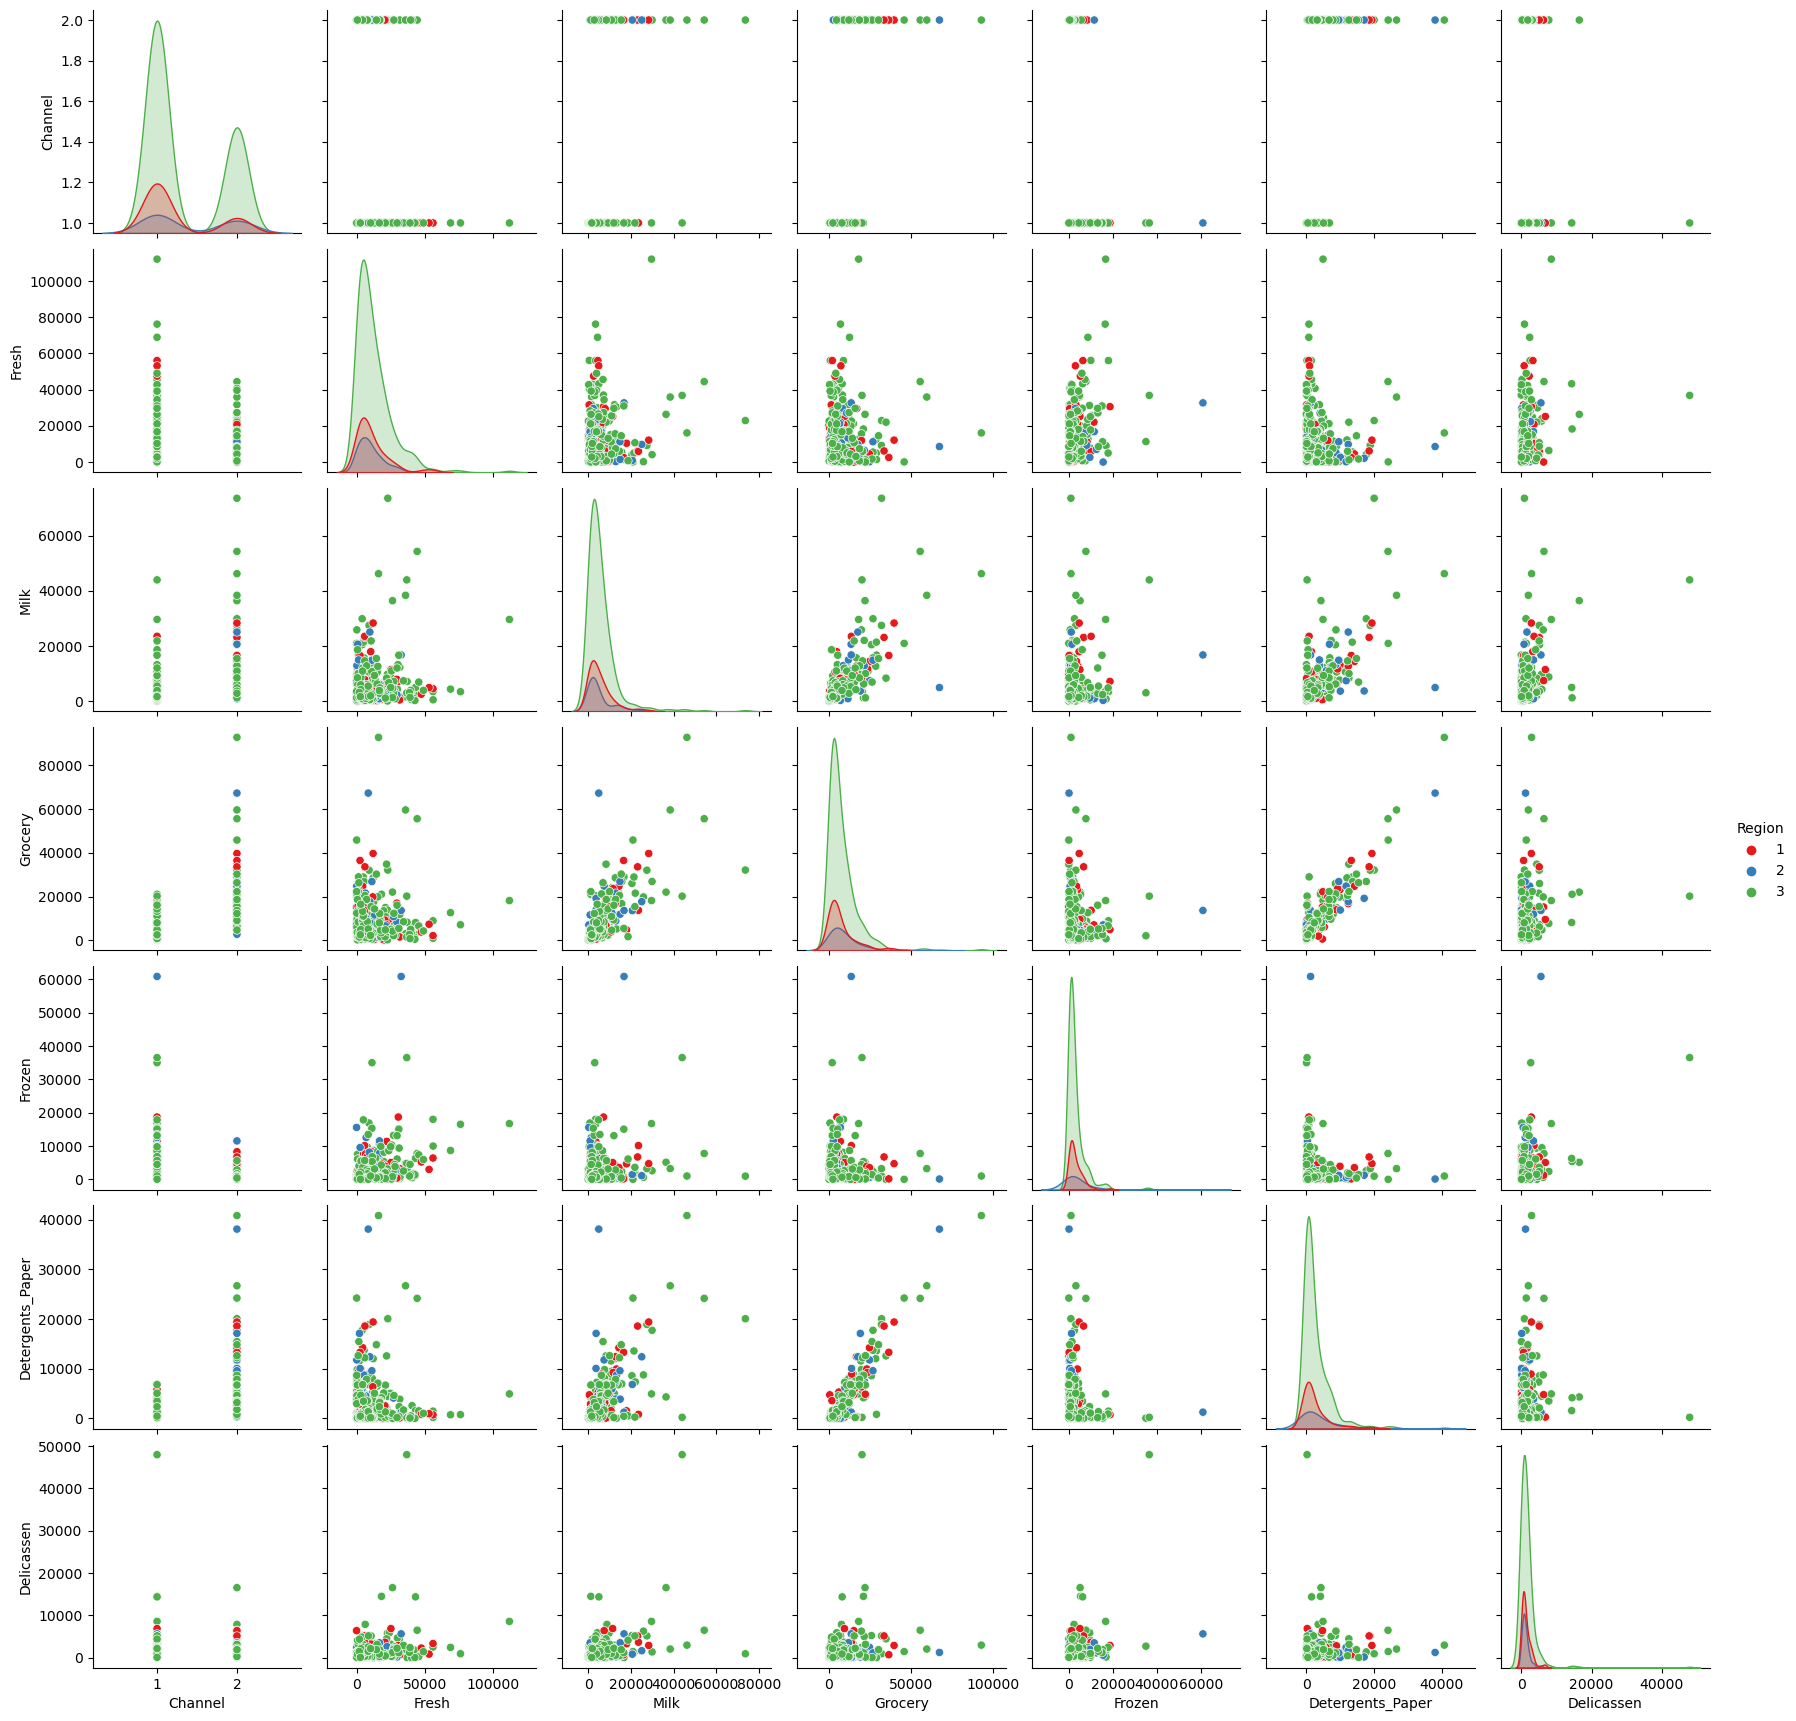

In [42]:
sns.pairplot(df,hue='Region',palette='Set1')

#### Нормализация

In [43]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

#### Подбор гиперпараметров по уменьшению выбросов

In [44]:
outlier_percent = []

for eps in np.linspace(0.001,10,100):
    
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)
   
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

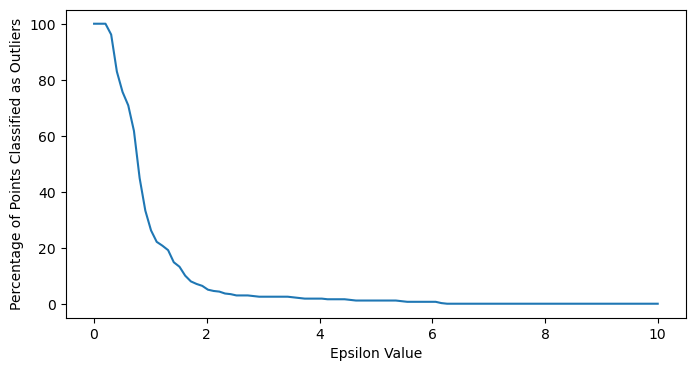

In [45]:
plt.figure(figsize = (8,4), dpi = 100)
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.show()

#### Модель

In [65]:
dbscan = DBSCAN(eps=1)
dbscan.fit(scaled_X)

DBSCAN(eps=1)

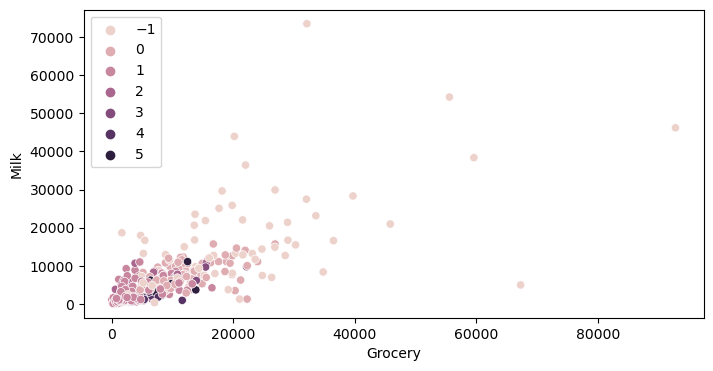

In [66]:
plt.figure(figsize = (8,4), dpi = 100)
sns.scatterplot(data=df,x='Grocery',y='Milk',hue=dbscan.labels_)
plt.show()

In [67]:
df['Labels'] = dbscan.labels_

In [68]:
cats = df.drop(['Channel','Region'],axis=1)
cats.groupby('Labels').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,20439.543210,13867.851852,17811.777778,6744.530864,6887.765432,3532.765432
0,8162.337349,7760.204819,12315.879518,1332.855422,5319.048193,1352.698795
1,11296.481283,2732.978610,3313.828877,2556.550802,727.556150,1015.411765
2,9614.300000,2890.440000,3349.240000,2387.280000,988.520000,873.080000
3,2006.166667,7330.166667,13231.166667,1249.666667,5897.000000,1498.500000
4,11288.269231,1823.153846,3939.500000,3245.807692,470.346154,954.076923
5,6909.285714,5141.714286,9232.571429,769.714286,5053.857143,740.285714


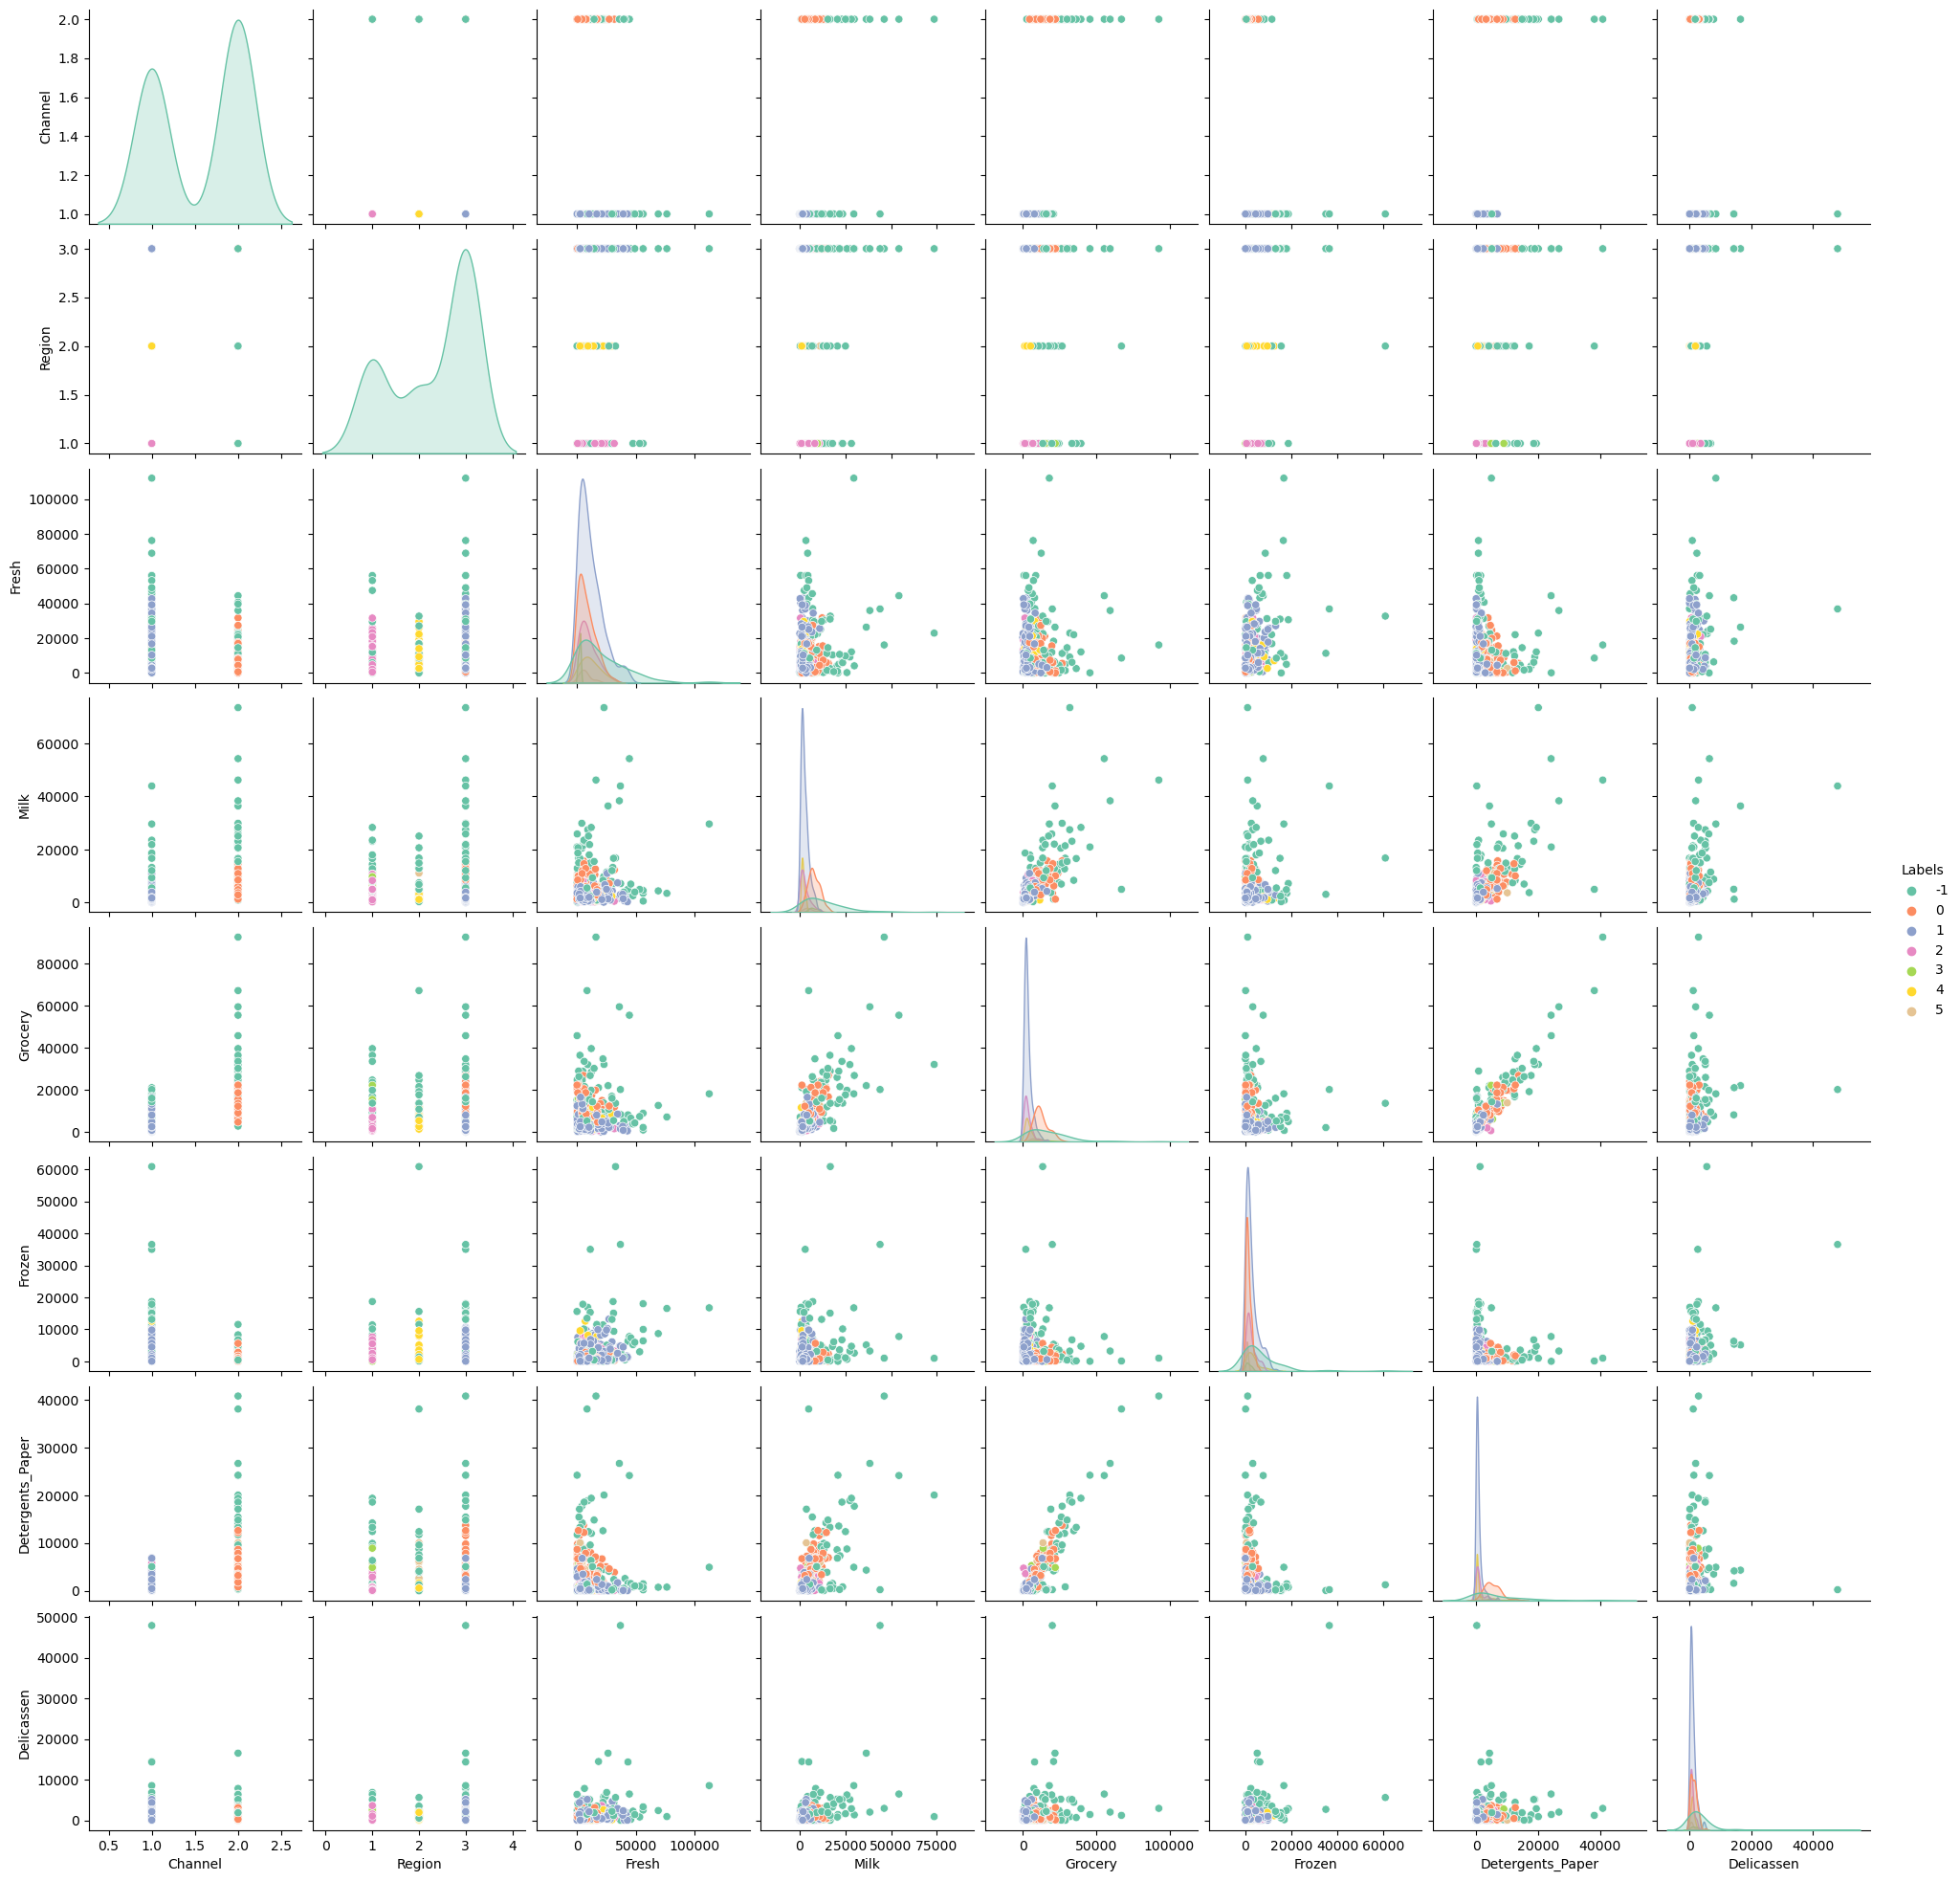

In [70]:
sns.pairplot(df,hue='Labels',palette='Set2')

#### eps = 2

In [59]:
dbscan = DBSCAN(eps=2)
dbscan.fit(scaled_X)

DBSCAN(eps=2)

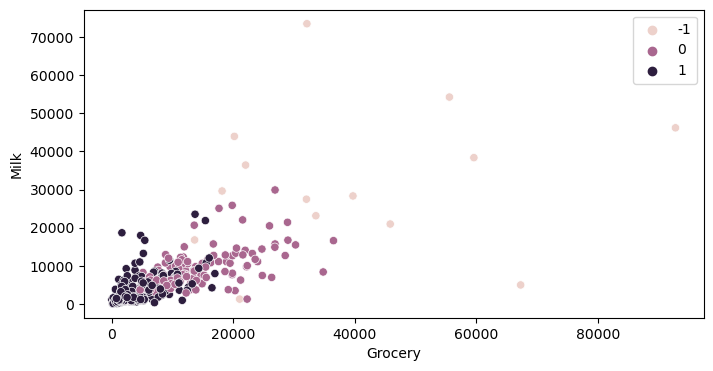

In [60]:
plt.figure(figsize = (8,4), dpi = 100)
sns.scatterplot(data=df,x='Grocery',y='Milk',hue=dbscan.labels_)
plt.show()

In [63]:
df['Labels'] = dbscan.labels_
cats = df.drop(['Channel','Region'],axis=1)
cats.groupby('Labels').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


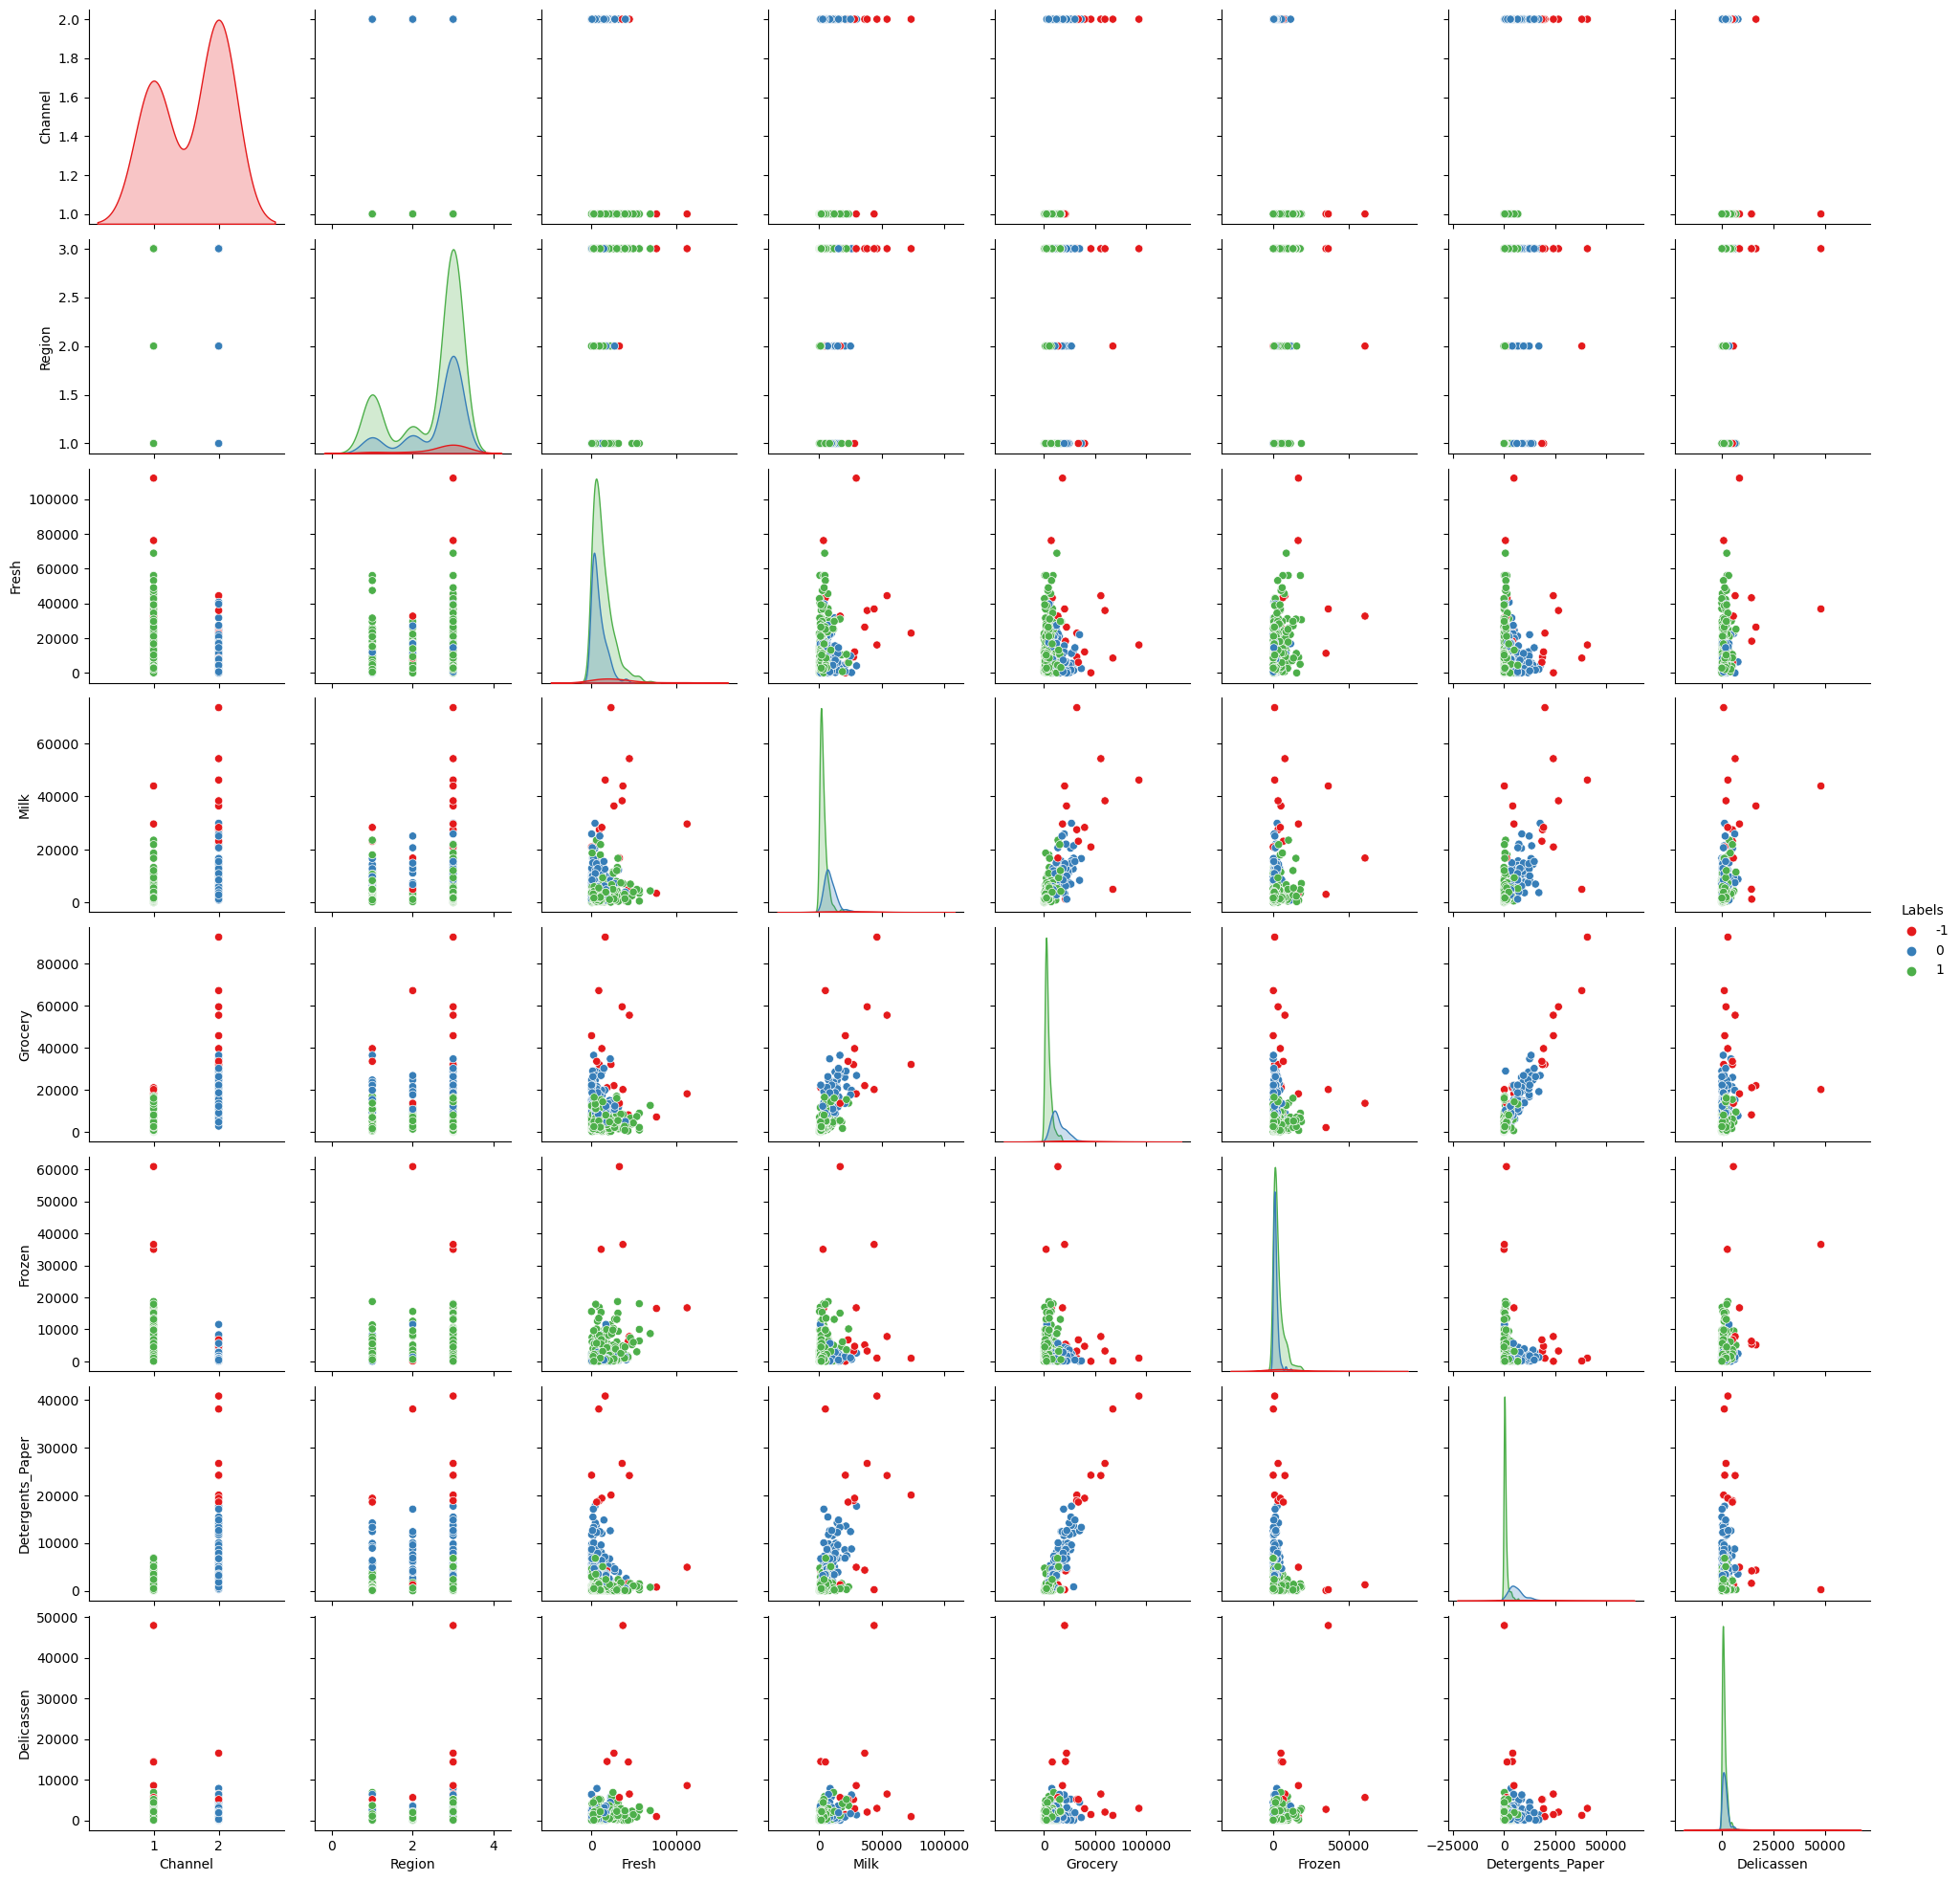

In [64]:
sns.pairplot(df,hue='Labels',palette='Set1')

#### eps = 3

In [52]:
dbscan = DBSCAN(eps=3)
dbscan.fit(scaled_X)

DBSCAN(eps=3)

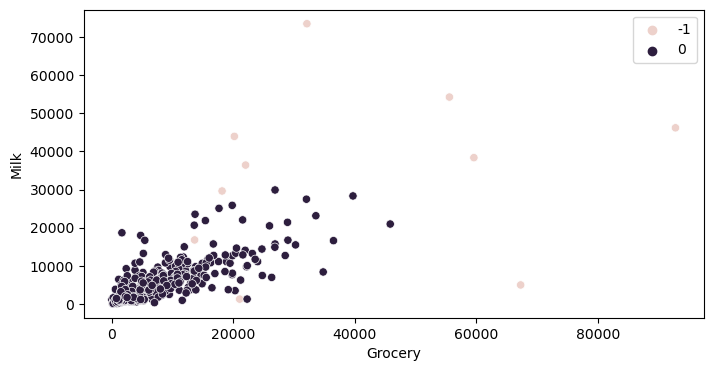

In [53]:
plt.figure(figsize = (8,4), dpi = 100)
sns.scatterplot(data=df,x='Grocery',y='Milk',hue=dbscan.labels_)
plt.show()

In [54]:
df['Labels'] = dbscan.labels_

In [55]:
cats = df.drop(['Channel','Region'],axis=1)
cats.groupby('Labels').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,34081.083333,29455.666667,34378.750000,14931.333333,13874.166667,10307.500000
0,11381.210280,5132.918224,7210.320093,2739.425234,2573.287383,1278.628505


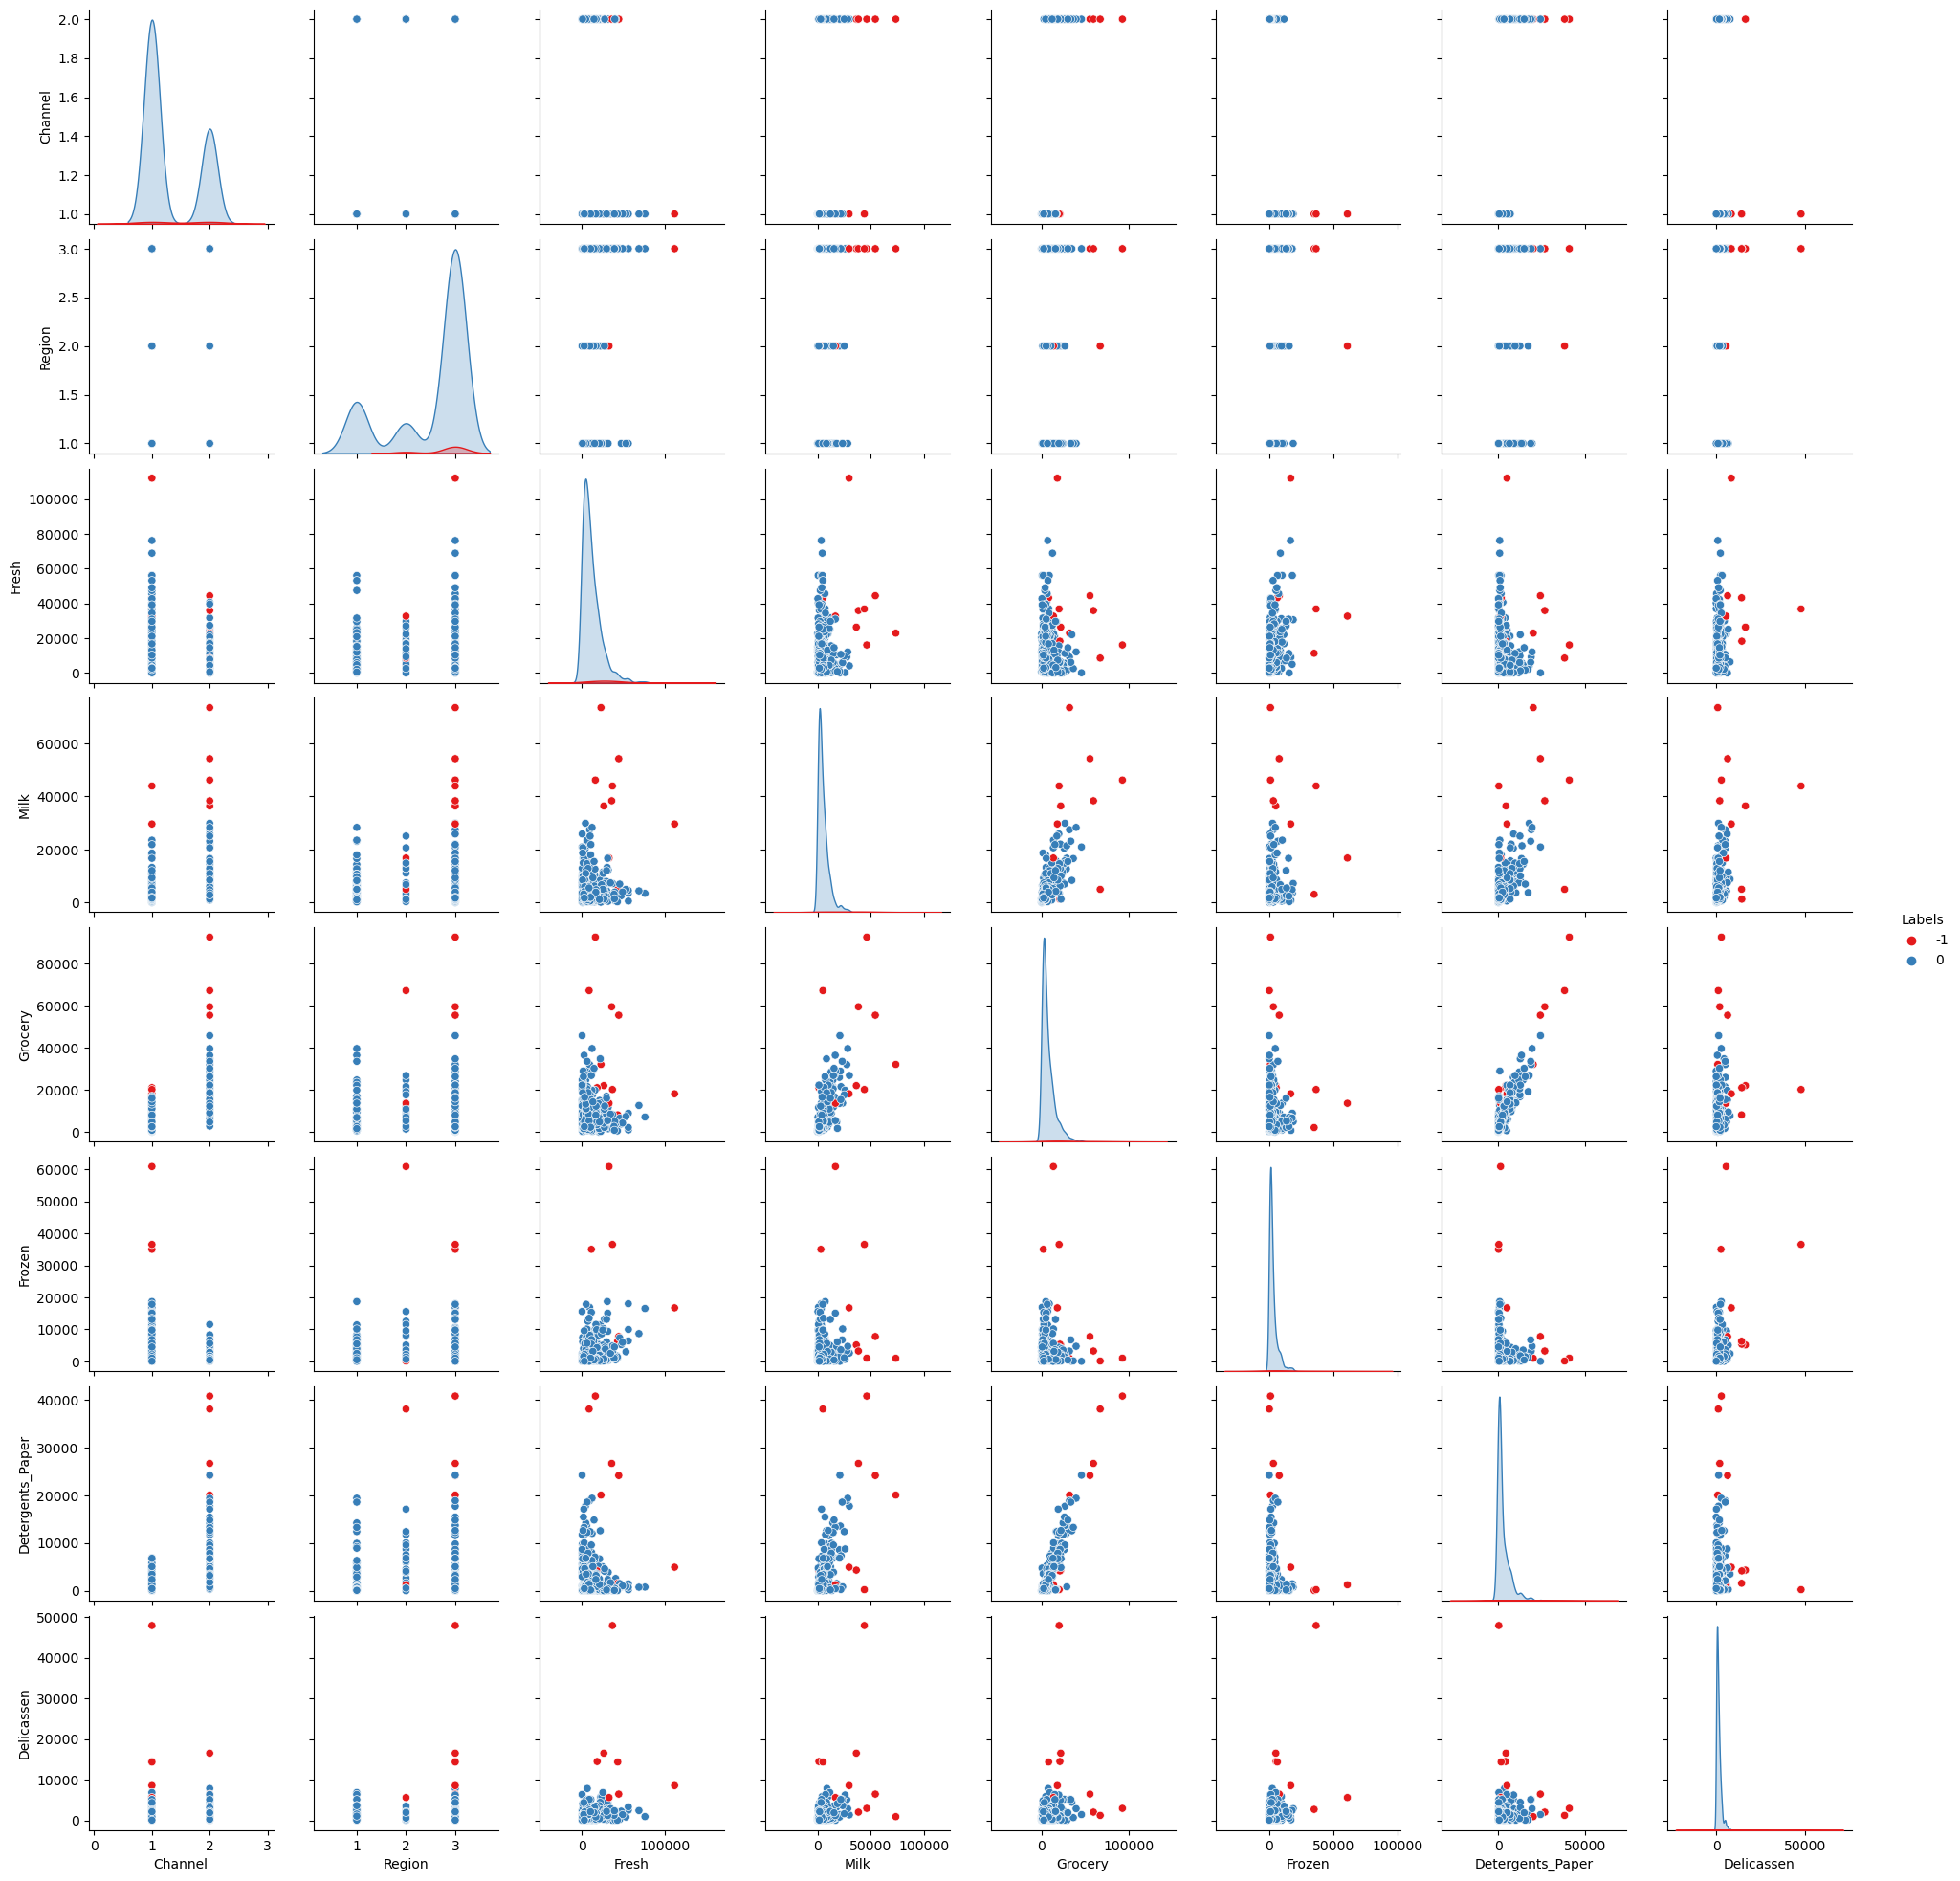

In [57]:
sns.pairplot(df,hue='Labels',palette='Set1')

### Вывод

* На маленьком eps выделили крупные группы, но много ложных обозначений выбросами
* на большом eps выделили выбросы, но все остальные склеены во вторую группу
  